In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# from zipfile import ZipFile
# file_name = 'archive.zip'
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print("Done..")

## Libraries

In [3]:
import cv2
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

## Preprocessing(Training Data)

In [4]:
d = os.path.join("../../Training Image Data/Training_Data(80)/train")
classes = ['Glass', 'Metal', 'Paper', 'Plastic', 'Trash']

In [5]:
for label in classes:
    directory = os.path.join(d, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Glass":	 1448
Images of label "Metal":	 1485
Images of label "Paper":	 1491
Images of label "Plastic":	 1421
Images of label "Trash":	 1763


In [6]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [7]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [8]:
x_train=np.array(X)
y_train=np.array(Y)
print(x_train.shape,y_train.shape)

(7608, 224, 224, 3) (7608,)


## Preprocessing(Testing Data)

In [9]:
d = os.path.join("../../Training Image Data/Training_Data(80)/val")
classes = ['Glass', 'Metal', 'Paper', 'Plastic', 'Trash']

In [10]:
for label in classes:
    directory = os.path.join(d, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Glass":	 371
Images of label "Metal":	 371
Images of label "Paper":	 373
Images of label "Plastic":	 357
Images of label "Trash":	 441


In [11]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [12]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [13]:
x_test=np.array(X)
y_test=np.array(Y)
print(x_test.shape,y_test.shape)

(1913, 224, 224, 3) (1913,)


In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(7608, 224, 224, 3) (7608,)
(1913, 224, 224, 3) (1913,)


## Build Model

In [15]:
model_vgg19=tf.keras.applications.vgg19.VGG19(
    input_shape=None,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [16]:
model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
base_input4=model_vgg19.layers[0].input
base_output4=model_vgg19.layers[-2].output

final_output4 = layers.Dense(240)(base_output4)
final_output4 = layers.Activation('relu')(final_output4)
final_output4 = layers.Dense(128)(final_output4)
final_output4 = layers.Activation('relu')(final_output4)
final_output4 = layers.Dense(64)(final_output4)
final_output4 = layers.Activation('relu')(final_output4)
final_output4 = layers.Dense(5, activation='softmax')(final_output4)

In [18]:
new_model_vgg19 = tf.keras.Model(inputs = base_input4, outputs = final_output4)

In [19]:
new_model_vgg19.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

## Train Model

In [20]:
result_V=new_model_vgg19.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20
238/238 [==============================] - 3310s 14s/step - loss: 1.1481 - accuracy: 0.5130 - val_loss: 0.7869 - val_accuracy: 0.6686
Epoch 2/20
238/238 [==============================] - 3167s 13s/step - loss: 0.5680 - accuracy: 0.7927 - val_loss: 0.3533 - val_accuracy: 0.8745
Epoch 3/20
238/238 [==============================] - 3082s 13s/step - loss: 0.3409 - accuracy: 0.8763 - val_loss: 0.3199 - val_accuracy: 0.8876
Epoch 4/20
238/238 [==============================] - 3081s 13s/step - loss: 0.1991 - accuracy: 0.9284 - val_loss: 0.2018 - val_accuracy: 0.9252
Epoch 5/20
238/238 [==============================] - 3079s 13s/step - loss: 0.1311 - accuracy: 0.9549 - val_loss: 0.1816 - val_accuracy: 0.9373
Epoch 6/20
238/238 [==============================] - 3079s 13s/step - loss: 0.1249 - accuracy: 0.9607 - val_loss: 0.1746 - val_accuracy: 0.9383
Epoch 7/20
238/238 [==============================] - 3079s 13s/step - loss: 0.0339 - accuracy: 0.9903 - val_loss: 0.1897 - val_ac

## Accuracy

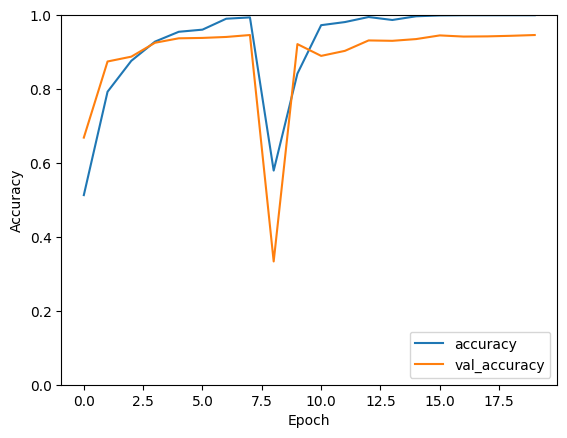

In [21]:
plt.plot(result_V.history['accuracy'], label='accuracy')
plt.plot(result_V.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

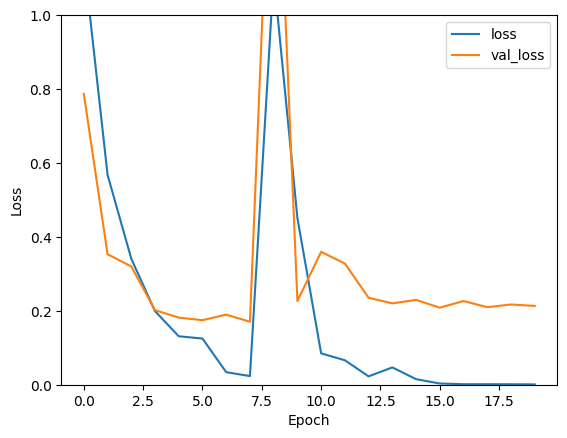

In [22]:
plt.plot(result_V.history['loss'], label='loss')
plt.plot(result_V.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')

In [23]:
loss , accuracy = new_model_vgg19.evaluate(x_test,y_test)

60/60 [==============================] - 135s 2s/step - loss: 0.2132 - accuracy: 0.9462


In [24]:
y_pred = new_model_vgg19.predict(x_test).round(2)

60/60 [==============================] - 135s 2s/step


[[353  11   0   3   4]
 [ 14 347   2   5   3]
 [  0   2 361   1   9]
 [ 11   5   2 333   6]
 [  4   9  11   1 416]]


<Axes: >

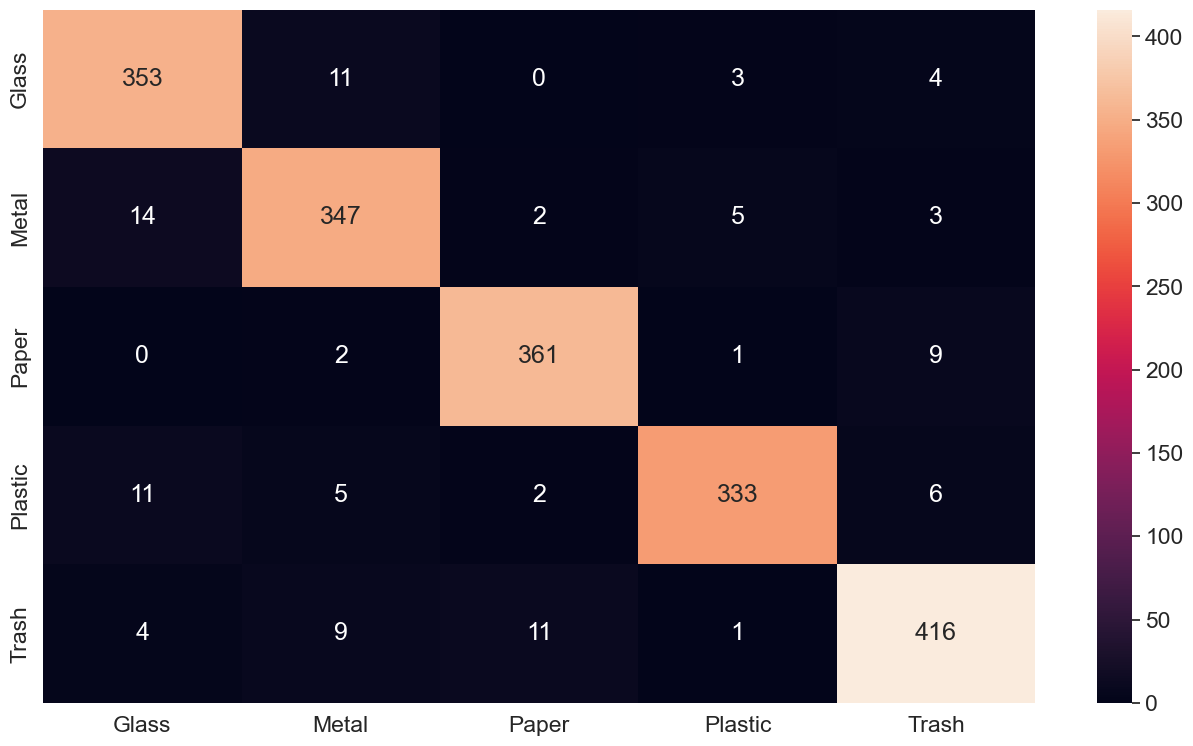

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

In [26]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=classes)
print(cr)

              precision    recall  f1-score   support

       Glass       0.92      0.95      0.94       371
       Metal       0.93      0.94      0.93       371
       Paper       0.96      0.97      0.96       373
     Plastic       0.97      0.93      0.95       357
       Trash       0.95      0.94      0.95       441

    accuracy                           0.95      1913
   macro avg       0.95      0.95      0.95      1913
weighted avg       0.95      0.95      0.95      1913



# Save The Model

In [27]:
# serialize model to JSON
model_json = new_model_vgg19.to_json()
with open("VGG_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
new_model_vgg19.save_weights("VGG_model.h5")

## Saving Model In Drive

In [28]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [29]:
# !ls "/content/gdrive/My Drive"

In [30]:
# model_json = new_model_vgg19.to_json()
# with open("/content/gdrive/My Drive/Colab Notebooks/VGG2_model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# new_model_vgg19.save_weights("/content/gdrive/My Drive/Colab Notebooks/VGG2_modell.h5")

In [31]:
# !ls "/content/gdrive/My Drive/Colab Notebooks"